# Alphas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
from decimal import ROUND_HALF_UP, Decimal
from statsmodels.api import OLS
import random
import statsmodels.api as sm
from ta.volume import volume_weighted_average_price
from tqdm.auto import tqdm
tqdm.pandas()


In [4]:
train_stock_prices = pd.read_csv('ds/train_files/stock_prices.csv')
supplemental_stock_prices = pd.read_csv('ds/supplemental_files/stock_prices.csv')
data_stock_prices = pd.concat([train_stock_prices,supplemental_stock_prices],ignore_index=True)

In [5]:
train_financials = pd.read_csv('ds/train_files/financials.csv',low_memory=False)
train_financials["Date"] = pd.to_datetime(train_financials["Date"])
train_financials["EarningsPerShare"] = pd.to_numeric(train_financials["EarningsPerShare"],errors='coerce')
supplemental_financials = pd.read_csv('ds/supplemental_files/financials.csv')
supplemental_financials["Date"] = pd.to_datetime(supplemental_financials["Date"])
supplemental_financials["EarningsPerShare"] = pd.to_numeric(train_financials["EarningsPerShare"],errors='coerce')

In [7]:
train_financials["QuarterEarningsPerShare"] = train_financials[(train_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby("SecuritiesCode")["EarningsPerShare"].diff()
train_financials.loc[train_financials["TypeOfCurrentPeriod"]=="1Q","QuarterEarningsPerShare"] = train_financials["EarningsPerShare"]
supplemental_financials["QuarterEarningsPerShare"] = supplemental_financials[(supplemental_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby("SecuritiesCode")["EarningsPerShare"].diff()
supplemental_financials.loc[supplemental_financials["TypeOfCurrentPeriod"]=="1Q","QuarterEarningsPerShare"] = supplemental_financials["EarningsPerShare"]

In [8]:
train_financials["QuarterEarningsPerShareFour"] = train_financials[(train_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby(["SecuritiesCode"])["QuarterEarningsPerShare"].shift(4)
supplemental_financials["QuarterEarningsPerShareFour"] = supplemental_financials[(supplemental_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby(["SecuritiesCode"])["QuarterEarningsPerShare"].shift(4)
train_financials['QuarterEarningsStd'] = train_financials[(train_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby("SecuritiesCode")["QuarterEarningsPerShare"].rolling(8,1).std().reset_index(0,drop=True)
supplemental_financials['QuarterEarningsStd'] = supplemental_financials[(supplemental_financials["TypeOfDocument"].isin(["1QFinancialStatements_Consolidated_JP","2QFinancialStatements_Consolidated_JP","3QFinancialStatements_Consolidated_JP","FYFinancialStatements_Consolidated_JP","1QFinancialStatements_NonConsolidated_JP","2QFinancialStatements_NonConsolidated_JP","3QFinancialStatements_NonConsolidated_JP","FYFinancialStatements_NonConsolidated_JP","1QFinancialStatements_Consolidated_IFRS","2QFinancialStatements_Consolidated_IFRS","3QFinancialStatements_Consolidated_IFRS","FYFinancialStatements_Consolidated_IFRS","1QFinancialStatements_NonConsolidated_IFRS","2QFinancialStatements_NonConsolidated_IFRS","3QFinancialStatements_NonConsolidated_IFRS","FYFinancialStatements_NonConsolidated_IFRS","1QFinancialStatements_Consolidated_US","2QFinancialStatements_Consolidated_US","3QFinancialStatements_Consolidated_US","FYFinancialStatements_Consolidated_US","1QFinancialStatements_NonConsolidated_US","2QFinancialStatements_NonConsolidated_US","3QFinancialStatements_NonConsolidated_US","FYFinancialStatements_NonConsolidated_US"]))].groupby("SecuritiesCode")["QuarterEarningsPerShare"].rolling(8,1).std().reset_index(0,drop=True)

In [9]:
def calc_adjusted_close(df):
    df = df.sort_values("Date",ascending=False)
    df.loc[:,"cummulative_adjustment_factor"] = df["AdjustmentFactor"].cumprod()
    df.loc[:,"adjusted_close"] = (df["cummulative_adjustment_factor"]*df["Close"]).map(lambda x: float(Decimal(str(x)).quantize(Decimal("0.1"),rounding=ROUND_HALF_UP)))
    df.loc[:,"adjusted_open"] = (df["cummulative_adjustment_factor"]*df["Open"]).map(lambda x: float(Decimal(str(x)).quantize(Decimal("0.1"),rounding=ROUND_HALF_UP)))
    df.loc[:,"adjusted_high"] = (df["cummulative_adjustment_factor"]*df["High"]).map(lambda x: float(Decimal(str(x)).quantize(Decimal("0.1"),rounding=ROUND_HALF_UP)))
    df.loc[:,"adjusted_low"] = (df["cummulative_adjustment_factor"]*df["Low"]).map(lambda x: float(Decimal(str(x)).quantize(Decimal("0.1"),rounding=ROUND_HALF_UP)))
    df = df.sort_values("Date")
    df.loc[df["adjusted_close"]==0,"adjusted_close"] = np.nan
    df.loc[:,"adjusted_close"] = df.loc[:,"adjusted_close"].ffill()
    return df

In [10]:
def calc_adjusted_volume(df):
    df.loc[:,"adjusted_volume"] = (df["Volume"]/df["cummulative_adjustment_factor"]).map(lambda x: float(Decimal(str(x)).quantize(Decimal("0.1"),rounding=ROUND_HALF_UP)))
    df = df.sort_values("Date")
    df.loc[df["adjusted_volume"]==0,"adjusted_volume"] = np.nan
    df.loc[:,"adjusted_volume"] = df.loc[:,"adjusted_volume"].ffill()
    return df

In [11]:

def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        #Target is the rate of change 
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    print(buf.mean())
    print(buf.std())
    buf.plot()
    return sharpe_ratio

In [27]:
def factor_2(open,close,volume):
    temp_1 = np.log(volume).diff(2)
    temp_1_rank = temp_1.rank(pct=True)
    temp_2 = (close-open)/open
    temp_2_rank = temp_2.rank(pct=True)
    #measures correlation between change in volume in two days and the daily return, to check for reversal strategy
    #if positive return increases as volume increases
    #Higher returns if correlation is negative
    #Hence if volume is high,returns must be low , if volume is low, returns must be high
    #We want to buy when volume is high returns is low and short when volume is low and returns is high
    #Factor 2 only shows the correlation, will need to combine with another indicator to divide it
    factor = -1 * temp_1_rank.rolling(6).corr(temp_2_rank)
    factor = factor.to_frame()
    return     factor
    

In [28]:
def factor_13(close,volume):
    close_rank = close.rank(pct = True)
    volume_rank = volume.rank(pct = True)
    factor = -1 * (close_rank.rolling(5).cov(volume_rank)).rank(pct=True)
    #if covariance is negative, the higher the returns
    return factor

In [29]:
def factor_41(high,low,vwap):
    return (vwap - np.sqrt(high*low)) 

In [30]:
def factor_83(high,low,close,volume,vwap):
    tmp = (high-low)/close.rolling(5).mean()
    numerator = tmp.shift(2).rank(pct=True) * volume.rank(pct=True)
    denominator = tmp/(vwap-close)
    factor = numerator/denominator
    return factor

In [31]:
def factor_55(high,low,close,volume):
    rolling_12_low = low.rolling(12).min()
    rolling_12_high = high.rolling(12).max()
    daily_rank = ((close-rolling_12_low)/(rolling_12_high - rolling_12_low)).rank(pct = True)
    volume_rank = volume.rank(pct=True)
    factor = -1 * daily_rank.rolling(6).corr(volume_rank)
    return factor

In [32]:
def factor_101(close,open,high,low):
    factor = (close-open)/(high-low)
    #if closing price is closer to high, returns are higher
    return factor

In [33]:
def combine(open,close,high,low,volume,vwap):
    a = factor_2(open,close,volume)
    b = factor_13(close,volume)
    c = factor_41(high,low,vwap)
    d = factor_55(high,low,close,volume)
    e = factor_83(high,low,close,volume,vwap)
    f = factor_101(close,open,high,low)
    return a,b,c,d,e,f

In [34]:
def create_features(df):
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.drop(["RowId"],axis=1)
    df = df[df["Date"]!="2020-10-01"]
    df = df.groupby("SecuritiesCode").apply(calc_adjusted_close).reset_index(drop=True).sort_values(["Date","SecuritiesCode"]).reset_index(drop=True)
    df = df.groupby("SecuritiesCode").apply(calc_adjusted_volume).reset_index(drop=True).sort_values(["Date","SecuritiesCode"]).reset_index(drop=True)
    df["VWAP"] = df.groupby("SecuritiesCode").apply(lambda x: volume_weighted_average_price(x["adjusted_high"],x["adjusted_low"],x["adjusted_close"],x["adjusted_volume"],5)).reset_index(drop=True)
    df["factor_2"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_2(x["adjusted_open"],x["adjusted_close"],x["adjusted_volume"])).reset_index(0,drop=True)
    df["factor_13"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_13(x["adjusted_close"],x["adjusted_volume"])).reset_index(0,drop=True)
    df["factor_41"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_41(x["adjusted_high"],x["adjusted_low"],x["VWAP"])).reset_index(0,drop=True)
    df["factor_55"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_55(x["adjusted_high"],x["adjusted_low"],x['adjusted_close'],x["adjusted_volume"])).reset_index(0,drop=True)
    df["factor_83"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_83(x["adjusted_high"],x["adjusted_low"],x['adjusted_close'],x["adjusted_volume"],x["VWAP"])).reset_index(0,drop=True)
    df["factor_101"] = df.groupby("SecuritiesCode").progress_apply(lambda x : factor_101(x["adjusted_close"],x["adjusted_open"],x['adjusted_high'],x["adjusted_low"])).reset_index(0,drop=True)
    df=df.dropna(subset=["factor_55"])
    df["Rank"] = df.groupby(["Date"])["factor_55"].rank(method='first',ascending=False)-1
    return df

In [21]:
%%time
test = create_features(train_stock_prices)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Wall time: 2min 16s


In [35]:
%%time
test = create_features(train_stock_prices)

  0%|          | 0/2000 [00:00<?, ?it/s]

ValueError: Must have equal len keys and value when setting with an iterable

In [37]:
df.groupby("SecuritiesCode").progress_apply(lambda x : combine(x["adjusted_open"],x["adjusted_close"],x['adjusted_high'],x['adjusted_low'],x["adjusted_volume"],x["VWAP"]))

  0%|          | 0/2000 [00:00<?, ?it/s]

StopIteration: 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.13064959211379687
1.274442178257963


0.10251511943239512

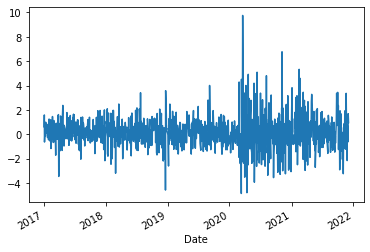

In [256]:
test = create_features(train_stock_prices)
calc_spread_return_sharpe(test)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.05572175101906737
0.7290469413084415


0.07643095096052656

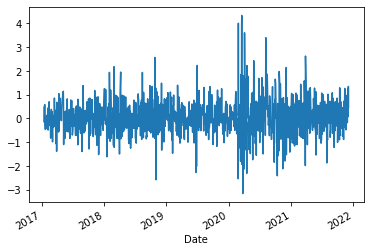

In [231]:
#This is factor 2
test = create_features(train_stock_prices)
calc_spread_return_sharpe(test)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.12373887290002819
1.273213923432733


0.09718623918784501

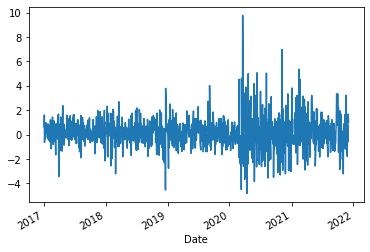

In [253]:
#41
test = create_features(train_stock_prices)
calc_spread_return_sharpe(test)